In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting library
import seaborn as sns #seaborn lib
import re
from qpsolvers import solve_qp #quadratic programming library

import warnings
warnings.filterwarnings('ignore')

In [2]:
dirname = 'data_and_kernels/'
def directory_name(df, kfold):
    if kfold == -1:
        return 'data_and_kernels/df'+str(df)+'/'
    else:
        return 'data_and_kernels/df'+str(df)+'/kfold'+str(kfold)+'/'

## Compute KKR and SVM for each kernel and dataset

In [3]:
## Lecture des bases de données
df_path = pd.read_csv(dirname+'data_path_with_kernels.csv')

In [4]:
df_path

df  kfold                                  Xtr_id  \
0    0     -1         data_and_kernels/df0/Xtr_id.npy   
1    1     -1         data_and_kernels/df1/Xtr_id.npy   
2    2     -1         data_and_kernels/df2/Xtr_id.npy   
3    0      0  data_and_kernels/df0/kfold0/Xtr_id.npy   
4    0      1  data_and_kernels/df0/kfold1/Xtr_id.npy   
5    0      2  data_and_kernels/df0/kfold2/Xtr_id.npy   
6    0      3  data_and_kernels/df0/kfold3/Xtr_id.npy   
7    0      4  data_and_kernels/df0/kfold4/Xtr_id.npy   
8    1      0  data_and_kernels/df1/kfold0/Xtr_id.npy   
9    1      1  data_and_kernels/df1/kfold1/Xtr_id.npy   
10   1      2  data_and_kernels/df1/kfold2/Xtr_id.npy   
11   1      3  data_and_kernels/df1/kfold3/Xtr_id.npy   
12   1      4  data_and_kernels/df1/kfold4/Xtr_id.npy   
13   2      0  data_and_kernels/df2/kfold0/Xtr_id.npy   
14   2      1  data_and_kernels/df2/kfold1/Xtr_id.npy   
15   2      2  data_and_kernels/df2/kfold2/Xtr_id.npy   
16   2      3  data_and_kernels/df2/kfold3/Xtr_id.npy   
17   2      4  data_and_kernels/df2/kfold4/Xtr_id.npy   

                                    Ytr                                  Xtr  \
0          data_and_kernels/df0/Ytr.npy         data_and_kernels/df0/Xtr.npy   
1          data_and_kernels/df1/Ytr.npy         data_and_kernels/df1/Xtr.npy   
2          data_and_kernels/df2/Ytr.npy         data_and_kernels/df2/Xtr.npy   
3   data_and_kernels/df0/kfold0/Ytr.npy  data_and_kernels/df0/kfold0/Xtr.npy   
4   data_and_kernels/df0/kfold1/Ytr.npy  data_and_kernels/df0/kfold1/Xtr.npy   
5   data_and_kernels/df0/kfold2/Ytr.npy  data_and_kernels/df0/kfold2/Xtr.npy   
6   data_and_kernels/df0/kfold3/Ytr.npy  data_and_kernels/df0/kfold3/Xtr.npy   
7   data_and_kernels/df0/kfold4/Ytr.npy  data_and_kernels/df0/kfold4/Xtr.npy   
8   data_and_kernels/df1/kfold0/Ytr.npy  data_and_kernels/df1/kfold0/Xtr.npy   
9   data_and_kernels/df1/kfold1/Ytr.npy  data_and_kernels/df1/kfold1/Xtr.npy   
10  data_and_kernels/df1/kfold2/Ytr.npy  data_and_kernels/df1/kfold2/Xtr.npy   
11  data_and_kernels/df1/kfold3/Ytr.npy  data_and_kernels/df1/kfold3/Xtr.npy   
12  data_and_kernels/df1/kfold4/Ytr.npy  data_and_kernels/df1/kfold4/Xtr.npy   
13  data_and_kernels/df2/kfold0/Ytr.npy  data_and_kernels/df2/kfold0/Xtr.npy   
14  data_and_kernels/df2/kfold1/Ytr.npy  data_and_kernels/df2/kfold1/Xtr.npy   
15  data_and_kernels/df2/kfold2/Ytr.npy  data_and_kernels/df2/kfold2/Xtr.npy   
16  data_and_kernels/df2/kfold3/Ytr.npy  data_and_kernels/df2/kfold3/Xtr.npy   
17  data_and_kernels/df2/kfold4/Ytr.npy  data_and_kernels/df2/kfold4/Xtr.npy   

                                    Xtr_mat100  \
0          data_and_kernels/df0/Xtr_mat100.npy   
1          data_and_kernels/df1/Xtr_mat100.npy   
2          data_and_kernels/df2/Xtr_mat100.npy   
3   data_and_kernels/df0/kfold0/Xtr_mat100.npy   
4   data_and_kernels/df0/kfold1/Xtr_mat100.npy   
5   data_and_kernels/df0/kfold2/Xtr_mat100.npy   
6   data_and_kernels/df0/kfold3/Xtr_mat100.npy   
7   data_and_kernels/df0/kfold4/Xtr_mat100.npy   
8   data_and_kernels/df1/kfold0/Xtr_mat100.npy   
9   data_and_kernels/df1/kfold1/Xtr_mat100.npy   
10  data_and_kernels/df1/kfold2/Xtr_mat100.npy   
11  data_and_kernels/df1/kfold3/Xtr_mat100.npy   
12  data_and_kernels/df1/kfold4/Xtr_mat100.npy   
13  data_and_kernels/df2/kfold0/Xtr_mat100.npy   
14  data_and_kernels/df2/kfold1/Xtr_mat100.npy   
15  data_and_kernels/df2/kfold2/Xtr_mat100.npy   
16  data_and_kernels/df2/kfold3/Xtr_mat100.npy   
17  data_and_kernels/df2/kfold4/Xtr_mat100.npy   

                                    Xtr_protein  \
0          data_and_kernels/df0/Xtr_protein.npy   
1          data_and_kernels/df1/Xtr_protein.npy   
2          data_and_kernels/df2/Xtr_protein.npy   
3   data_and_kernels/df0/kfold0/Xtr_protein.npy   
4   data_and_kernels/df0/kfold1/Xtr_protein.npy   
5   data_and_kernels/df0/kfold2/Xtr_protein.npy   
6   data_and_kernels/df0/kfold3/Xtr_protein.npy   
7   data_and_kernels/df0/kfold4/Xtr_prot

In [5]:
list(df_path.columns)

['df',
 'kfold',
 'Xtr_id',
 'Ytr',
 'Xtr',
 'Xtr_mat100',
 'Xtr_protein',
 'Yte',
 'Xte_id',
 'Xte',
 'Xte_mat100',
 'Xte_protein',
 'Ktr_linear',
 'Kte_linear',
 'Ktr_gaussian_1.0',
 'Kte_gaussian_1.0',
 'Ktr_gaussian_0.1',
 'Kte_gaussian_0.1',
 'Ktr_spectrum_DNA_1',
 'Kte_spectrum_DNA_1',
 'Ktr_spectrum_DNA_2',
 'Kte_spectrum_DNA_2',
 'Ktr_spectrum_protein_1',
 'Kte_spectrum_protein_1',
 'Ktr_spectrum_protein_2',
 'Kte_spectrum_protein_2',
 'Ktr_gaussian_0.3',
 'Kte_gaussian_0.3',
 'Ktr_gaussian_0.03',
 'Kte_gaussian_0.03',
 'Ktr_gaussian_0.01',
 'Kte_gaussian_0.01',
 'Ktr_spectrum_DNA_3',
 'Kte_spectrum_DNA_3',
 'Ktr_spectrum_DNA_4',
 'Kte_spectrum_DNA_4',
 'Ktr_spectrum_DNA_6',
 'Kte_spectrum_DNA_6',
 'Ktr_spectrum_DNA_9',
 'Kte_spectrum_DNA_9',
 'Ktr_spectrum_protein_3',
 'Kte_spectrum_protein_3',
 'Ktr_spectrum_protein_4',
 'Kte_spectrum_protein_4']

In [6]:
def get_npArray(df_path, df_id, kfold_id, array_name):
    path = df_path.loc[(df_path.df == df_id) & (df_path.kfold == kfold_id)][array_name].to_numpy()[0]
    #print(path)
    if path != '0':
        return np.load(path, allow_pickle=True)
    else:
        return np.nan

def get_npArray_dfid(df_path, df_id, array_name):
    path = df_path.loc[df_id][array_name]
    #print(path)
    if path != '0':
        return np.load(path, allow_pickle=True)
    else:
        return np.nan

In [7]:
get_npArray(df_path, 1, -1, 'Ktr_spectrum_DNA_9').shape
get_npArray_dfid(df_path, 1, 'Ktr_spectrum_DNA_9').shape

(2000, 2000)

### Add kernels together (boosting)

In [8]:
computeAdd = True

In [9]:
#addition kernels
if computeAdd:
    n=df_path.shape[0]
        
    KtrName = 'Ktr_add'
    KteName = 'Kte_add'
    df_path[KtrName] = np.empty((n,), dtype=str)
    df_path[KteName] = np.empty((n,), dtype=str)

    #compute addition kernel for each dataset
    for df_id in range(n):

        kfold = df_path['kfold'].loc[df_id]
        df = df_path['df'].loc[df_id]
        dirname = directory_name(df, kfold)

        #load kernels 
        Ktrain1 = get_npArray(df_path, df, kfold, 'Ktr_spectrum_DNA_6')
        Ktest1 = get_npArray(df_path, df, kfold, 'Kte_spectrum_DNA_6')
        K1_reg = 1.
        
        Ktrain2 = get_npArray(df_path, df, kfold, 'Ktr_gaussian_0.1')
        Ktest2 = get_npArray(df_path, df, kfold, 'Kte_gaussian_0.1')
        K2_reg = 1.
        
        Ktrain3 = get_npArray(df_path, df, kfold, 'Ktr_spectrum_DNA_9')
        Ktest3 = get_npArray(df_path, df, kfold, 'Kte_spectrum_DNA_9')
        K3_reg = 1.
        
        Ktrain4 = get_npArray(df_path, df, kfold, 'Ktr_spectrum_protein_3')
        Ktest4 = get_npArray(df_path, df, kfold, 'Kte_spectrum_protein_3')
        K4_reg = 1.
        
        Ktrain5 = get_npArray(df_path, df, kfold, 'Ktr_spectrum_protein_4')
        Ktest5 = get_npArray(df_path, df, kfold, 'Kte_spectrum_protein_4')
        K5_reg = 1.
        
        

        #compute and save Ktrain 
        Ktr = (K1_reg*Ktrain1 + K3_reg*Ktrain3 + K4_reg*Ktrain4 + K5_reg*Ktrain5)
        #Ktr = (K1_reg*Ktrain1 + K2_reg*Ktrain2 + K3_reg*Ktrain3)
        filepath = dirname+KtrName+'.npy'
        df_path[KtrName].loc[df_id] = filepath
        np.save(filepath, Ktr, allow_pickle=True)
        print(filepath+' successfully computed')

        #compute and save Ktest
        Kte = (K1_reg*Ktest1 + K3_reg*Ktest3 + K4_reg*Ktest4 + K5_reg*Ktest5)
        #Kte = (K1_reg*Ktest1 + K2_reg*Ktest2 + K3_reg*Ktest3)

        filepath = dirname+KteName+'.npy'
        df_path[KteName].loc[df_id] = filepath
        np.save(filepath, Kte, allow_pickle=True)
        print(filepath+' successfully computed')

data_and_kernels/df0/Ktr_add.npy successfully computed
data_and_kernels/df0/Kte_add.npy successfully computed
data_and_kernels/df1/Ktr_add.npy successfully computed
data_and_kernels/df1/Kte_add.npy successfully computed
data_and_kernels/df2/Ktr_add.npy successfully computed
data_and_kernels/df2/Kte_add.npy successfully computed
data_and_kernels/df0/kfold0/Ktr_add.npy successfully computed
data_and_kernels/df0/kfold0/Kte_add.npy successfully computed
data_and_kernels/df0/kfold1/Ktr_add.npy successfully computed
data_and_kernels/df0/kfold1/Kte_add.npy successfully computed
data_and_kernels/df0/kfold2/Ktr_add.npy successfully computed
data_and_kernels/df0/kfold2/Kte_add.npy successfully computed
data_and_kernels/df0/kfold3/Ktr_add.npy successfully computed
data_and_kernels/df0/kfold3/Kte_add.npy successfully computed
data_and_kernels/df0/kfold4/Ktr_add.npy successfully computed
data_and_kernels/df0/kfold4/Kte_add.npy successfully computed
data_and_kernels/df1/kfold0/Ktr_add.npy successful

In [10]:
df_path['Ktr_add_SVM'] = df_path['Ktr_add']
df_path['Kte_add_SVM'] = df_path['Kte_add']

# Inférence des modèles KRR et SVM pour chaque noyau,  et calcul des prédictions

### fontions d'inférence

In [11]:
def KernelRidgeRegression(K, Y, reg):
    """
    return the solution of a Kernel Ridge Regression (slide 95)
    """
    n = Y.shape[0];
    I = np.eye(n)
    alpha = np.linalg.inv(K + reg*n*I) @ Y
    return alpha


def WeigtedKernelRidgeRegression(K, Y, reg, w):
    """
    return the solution of a Weigthed Kernel Ridge Regression (slide 103)
    """
    n = Y.shape[0]
    I = np.eye(n)
    W = I * w
    Wsqrt = np.sqrt(W)
    
    alpha = Wsqrt @ np.linalg.inv(Wsqrt@K@Wsqrt + reg*n*I) @ Wsqrt @ Y
    
    return alpha

def sigmoid(a):
    """
    returns the sigmoid of each rows of a vector a of shape (n,)
    """
    one = np.ones(a.shape)
    sigma = one / (one + np.exp(-a))
    
    return sigma

def logistic_loss(a):
    """
    returns the logistic loss of each rows of a vector a of shape (n,)
    """
    logloss = np.log(1 + np.exp(-u))
    
    return logloss

def LogisticKernelRidgeRegression(K, Y, reg):
    """
    returns the solution of a Logistic Kernel Ridge Regression (slide 114)
    """
    n = Y.shape[0]
    alpha = np.zeros((n,))
    tol = 10**(-9) / reg
    improvement = 1
    t=0
    while improvement >= tol:
        m = K@alpha
        P = - sigmoid(-Y*m)
        w = sigmoid(m) * sigmoid(-m)
        Z = m - P*Y/w
        alphaNew = WeigtedKernelRidgeRegression(K, Z, reg, w)
        improvement = np.sum(np.abs(alpha - alphaNew))
        alpha = np.copy(alphaNew)
        
        print('itération '+str(t)+' : ' + str(improvement))
        t=t+1
        
    return alpha


def SupportVectorMachine(K, Y, reg):
    """
    returns the solution of a kernalized SVM (slide 157 - 158)
    """
    #solve dual problem
    n = K.shape[0]
    I = np.eye(n)
    D = I * Y
    one = np.ones((n,))
    
    P = (1/(4*reg)) * D@K@D # # this is a positive definite matrix
    q = - one
    G = None
    h = None
    A = None
    b = None
    lb = np.zeros((n,))
    up = (1/n) * np.ones((n,))

    mu = solve_qp(P, q, G, h, A, b, lb, up)
    
    #get the solution of the primal problem
    alpha = D@mu / (2*reg)
    
    return alpha

In [12]:
def is_positive_definite(K):
    """
    return True if positive definite matrix, False otherwise
    """
    return np.all(np.linalg.eigvals(K) >= 0)

### fontions de prediction

In [13]:
def sign(Y):
    "identify class {0, 1} from predictions [-1, 1]"
    Y = np.where(Y<=0, 0, Y)
    Y = np.where(Y>0, 1, Y)
    return Y

def accuracy(Y, YPred):
    numberOfWrongPredictions = np.sum(np.abs(Y - YPred))
    numberOfPredictions = Y.shape[0]
    accuracy = (numberOfPredictions - numberOfWrongPredictions) / numberOfPredictions
    
    return accuracy

## Inférence des modèles

In [14]:
def infer_and_predict_KRR(df_path, df_id_to_infer, kernel_name, regKRR):
    """
    infer model with KernelRidgeRegression (KRR) 
    need a kernel and regulations factors of each methods
    store results parameters, predictions, and scores
    return average accuracy on all validation subdatasets 
    """
    
    Ktr_name = 'Ktr_'+kernel_name
    Kte_name = 'Kte_'+kernel_name
    
    scoresKRR = []
    alpha_name_KRR = 'Ktr_'+kernel_name+'_alpha_KRR'
    reg_name_KRR = 'Ktr_'+kernel_name+'_reg_KRR'
    pred_name_KRR = 'Kte_'+kernel_name+'_pred_KRR'
    score_name_KRR = 'Kte_'+kernel_name+'_score_KRR'
    n = df_path.shape[0]
    # créer les colones dans la base si elles n'existent pas
    try:
        test = df_path[alpha_name_KRR]
    except : 
        df_path[alpha_name_KRR] = np.empty((n,), dtype=str)
        df_path[reg_name_KRR] = np.empty((n,), dtype=float)
        df_path[pred_name_KRR] = np.empty((n,), dtype=str)
        df_path[score_name_KRR] = np.empty((n,), dtype=float)
    
    for df_id in df_id_to_infer:
        
        #directory name for vector storage
        kfold = df_path['kfold'].loc[df_id]
        df = df_path['df'].loc[df_id]
        dirname = directory_name(df, kfold)      
        
        #chargement des noyaux et des labels
        Ktr = get_npArray_dfid(df_path, df_id, Ktr_name)
        Kte = get_npArray_dfid(df_path, df_id, Kte_name)
        Ytr = get_npArray_dfid(df_path, df_id, 'Ytr')
        Yte = sign(get_npArray_dfid(df_path, df_id, 'Yte'))
        
        #KRR training
        alphaKRR = KernelRidgeRegression(Ktr, Ytr, regKRR)
                    
        #save alpha
        filepath = dirname+alpha_name_KRR+'.npy'
        df_path[alpha_name_KRR].loc[df_id] = filepath
        np.save(filepath, alphaKRR, allow_pickle=True)
        #save regulation factor
        df_path[reg_name_KRR].loc[df_id] = regKRR
        
        #Predictions
        YPred_KRR = sign(Kte@alphaKRR)
        #save prediction
        filepath = dirname+pred_name_KRR+'.npy'
        df_path[pred_name_KRR].loc[df_id] = filepath
        np.save(filepath, YPred_KRR, allow_pickle=True)
        
        #Score
        #si des labels de test sont disponibles
        if (np.array([Yte]).T).shape[0] > 1:
            scoreKRR = accuracy(Yte, YPred_KRR)
            #save
            df_path[score_name_KRR].loc[df_id] = scoreKRR
            #append the list for global score 
            scoresKRR.append(scoreKRR)
        else:
            df_path[score_name_KRR].loc[df_id] = np.nan
    
    return scoresKRR

In [15]:
def infer_and_predict_SVM(df_path, df_id_to_infer, kernel_name, regSVM):
    """
    infer model with Support Vector Machines (SVM) 
    need a kernel and regulations factors of each methods
    store results parameters, predictions, and scores
    return average accuracy on all validation subdatasets 
    """
    
    Ktr_name = 'Ktr_'+kernel_name
    Kte_name = 'Kte_'+kernel_name
    
    scoresSVM = []
    alpha_name_SVM = 'Ktr_'+kernel_name+'_alpha_SVM'
    reg_name_SVM = 'Ktr_'+kernel_name+'_reg_SVM'
    pred_name_SVM = 'Kte_'+kernel_name+'_pred_SVM'
    score_name_SVM = 'Kte_'+kernel_name+'_score_SVM'
    n = df_path.shape[0]
    # créer les colones dans la base si elles n'existent pas
    try:
        test = df_path[alpha_name_SVM]
    except : 
        df_path[alpha_name_SVM] = np.empty((n,), dtype=str)
        df_path[reg_name_SVM] = np.empty((n,), dtype=float)
        df_path[pred_name_SVM] = np.empty((n,), dtype=str)
        df_path[score_name_SVM] = np.empty((n,), dtype=float)
    
    for df_id in df_id_to_infer:
        
        #directory name for vector storage
        kfold = df_path['kfold'].loc[df_id]
        df = df_path['df'].loc[df_id]
        dirname = directory_name(df, kfold)      
        
        #chargement des noyaux et des labels
        Ktr = get_npArray_dfid(df_path, df_id, Ktr_name)
        Kte = get_npArray_dfid(df_path, df_id, Kte_name)
        Ytr = get_npArray_dfid(df_path, df_id, 'Ytr')
        Yte = sign(get_npArray_dfid(df_path, df_id, 'Yte'))
        
        #SVM  training
        if np.all(np.linalg.eigvals(Ktr) > 0):
            alphaSVM = SupportVectorMachine(Ktr, Ytr, regSVM)
        else:
            alphaSVM = KernelRidgeRegression(Ktr, Ytr, regSVM)
                    
        #save alpha
        filepath = dirname+alpha_name_SVM+'.npy'
        df_path[alpha_name_SVM].loc[df_id] = filepath
        np.save(filepath, alphaSVM, allow_pickle=True)
        #save regulation factor
        df_path[reg_name_SVM].loc[df_id] = regSVM
        
        #Predictions
        YPred_SVM = sign(Kte@alphaSVM)
        #save prediction
        filepath = dirname+pred_name_SVM+'.npy'
        df_path[pred_name_SVM].loc[df_id] = filepath
        np.save(filepath, YPred_SVM, allow_pickle=True)
        
        #Score
        #si des labels de test sont disponibles
        if (np.array([Yte]).T).shape[0] > 1:
            scoreSVM = accuracy(Yte, YPred_SVM)
            #save
            df_path[score_name_SVM].loc[df_id] = scoreSVM
            #append the list for global score 
            scoresSVM.append(scoreSVM)
        else:
            df_path[score_name_SVM].loc[df_id] = np.nan
    
    return scoresSVM

In [16]:
#Kernels_to_infer = ['spectrum_protein_1', 'spectrum_protein_2', 'spectrum_protein_3', 'spectrum_protein_4']
Kernels_to_infer = ['linear', 
                    'gaussian_1.0',
                    'gaussian_0.3',
                    'gaussian_0.1',
                    'gaussian_0.03',
                    'gaussian_0.01',
                    'spectrum_DNA_6',
                    'spectrum_DNA_9', 
                    'spectrum_protein_3', 
                    'spectrum_protein_4', 
                    'add',
                    'add_SVM']
#Kernels_to_infer = ['spectrum_DNA_6','spectrum_DNA_9']
#Kernels_to_infer = ['add_SVM']
grid_search_todo = [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
regKRR_grid = [1.0, 0.6, 0.3, 0.1, 0.06, 0.03, 0.01, 0.006, 0.003, 0.001, 0.0006, 0.0003, 0.0001, 0.00006]
#regSVM_grid = [1.0, 0.6, 0.3, 0.1, 0.06, 0.03, 0.01, 0.006, 0.003, 0.001, 0.0006, 0.0003, 0.0001, 0.00006]
#regKRR_grid = [0.0004, 0.00035, 0.0003, 0.00025, 0.0002]
#df_id_to_infer = list(df_path.index)
df_ids = [[0,3,4,5,6,7],
          [1,8,9,10,11,12],
          [2,13,14,15,16,17]]

#pour chaque noyau
for i, kernel_name in enumerate(Kernels_to_infer):
    #choix des facteurs de regulation (à optimiser)
    print(kernel_name)
    regKRR = 0.001
    regSVM = 0.001
    
    #pour chaque source de données
    for df_id_to_infer in df_ids:
        print(df_id_to_infer)
        #grid search KRR
        if grid_search_todo[i]:
            print("Grid Search")

            regKRR_best = regKRR_grid[0]
            scoresKRR_mean_best = 0.0

            #test all regKRR
            for regKRR in regKRR_grid:
                #training
                scoresKRR = infer_and_predict_KRR(df_path, df_id_to_infer, kernel_name, regKRR)
                #scoring
                scoresKRR_mean = np.mean(scoresKRR)
                print(str(regKRR)+": "+str(scoresKRR_mean))
                if scoresKRR_mean > scoresKRR_mean_best:
                    scoresKRR_mean_best = scoresKRR_mean
                    regKRR_best = regKRR

            #save the best one
            scoresKRR = infer_and_predict_KRR(df_path, df_id_to_infer, kernel_name, regKRR_best)

            print(kernel_name + " : best regulation factor for KRR : ")
            print(str(regKRR_best)+": "+str(scoresKRR_mean_best))
            print("_")
            
            if kernel_name=="add_SVM":
                regSVM_best = regKRR_grid[0]
                scoresSVM_mean_best = 0.0

                #test all regKRR
                for regSVM in regKRR_grid:
                    #training
                    scoresSVM = infer_and_predict_SVM(df_path, df_id_to_infer, kernel_name, regSVM)
                    #scoring
                    scoresSVM_mean = np.mean(scoresSVM)
                    print(str(regSVM)+": "+str(scoresSVM_mean))
                    if scoresSVM_mean > scoresSVM_mean_best:
                        scoresSVM_mean_best = scoresSVM_mean
                        regSVM_best = regSVM

                #save the best one
                scoresSVM = infer_and_predict_SVM(df_path, df_id_to_infer, kernel_name, regSVM_best)

                print(kernel_name + " : best regulation factor for SVM : ")
                print(str(regSVM_best)+": "+str(scoresSVM_mean_best))
                print("_")
        
        #sinon prediction normale
        else:
            regKRR = df_path['Ktr_'+kernel_name+'_reg_KRR'].loc[0]
            scoresKRR = infer_and_predict_KRR(df_path, df_id_to_infer, kernel_name, regKRR)
            print(np.mean(scoresKRR))
            print(np.std(scoresKRR))

linear
[0, 3, 4, 5, 6, 7]
Grid Search
1.0: 0.5189999999999999
0.6: 0.5189999999999999
0.3: 0.5189999999999999
0.1: 0.5189999999999999
0.06: 0.5189999999999999
0.03: 0.5185
0.01: 0.5205
0.006: 0.528
0.003: 0.5449999999999999
0.001: 0.576
0.0006: 0.578
0.0003: 0.588
0.0001: 0.5885
6e-05: 0.5915
linear : best regulation factor for KRR : 
6e-05: 0.5915
_
[1, 8, 9, 10, 11, 12]
Grid Search
1.0: 0.5414999999999999
0.6: 0.5414999999999999
0.3: 0.541
0.1: 0.54
0.06: 0.5435000000000001
0.03: 0.5435
0.01: 0.5475
0.006: 0.549
0.003: 0.555
0.001: 0.5625
0.0006: 0.5645
0.0003: 0.5675
0.0001: 0.568
6e-05: 0.5700000000000001
linear : best regulation factor for KRR : 
6e-05: 0.5700000000000001
_
[2, 13, 14, 15, 16, 17]
Grid Search
1.0: 0.6605000000000001
0.6: 0.6605000000000001
0.3: 0.6605
0.1: 0.6609999999999999
0.06: 0.6639999999999999
0.03: 0.663
0.01: 0.6675
0.006: 0.6679999999999999
0.003: 0.6725
0.001: 0.6809999999999999
0.0006: 0.6785
0.0003: 0.6835
0.0001: 0.694
6e-05: 0.6955
linear : best regu

spectrum_DNA_9 : best regulation factor for KRR : 
0.0003: 0.722
_
spectrum_protein_3
[0, 3, 4, 5, 6, 7]
Grid Search
1.0: 0.5705
0.6: 0.5705000000000001
0.3: 0.5705
0.1: 0.579
0.06: 0.591
0.03: 0.6040000000000001
0.01: 0.6220000000000001
0.006: 0.635
0.003: 0.6375
0.001: 0.632
0.0006: 0.6335
0.0003: 0.6195
0.0001: 0.6014999999999999
6e-05: 0.5965
spectrum_protein_3 : best regulation factor for KRR : 
0.003: 0.6375
_
[1, 8, 9, 10, 11, 12]
Grid Search
1.0: 0.6125
0.6: 0.6125
0.3: 0.6129999999999999
0.1: 0.6125
0.06: 0.613
0.03: 0.6145
0.01: 0.6140000000000001
0.006: 0.6115
0.003: 0.609
0.001: 0.609
0.0006: 0.602
0.0003: 0.6
0.0001: 0.5945
6e-05: 0.5940000000000001
spectrum_protein_3 : best regulation factor for KRR : 
0.03: 0.6145
_
[2, 13, 14, 15, 16, 17]
Grid Search
1.0: 0.69
0.6: 0.6895
0.3: 0.6895
0.1: 0.6935
0.06: 0.6910000000000001
0.03: 0.69
0.01: 0.69
0.006: 0.6915000000000001
0.003: 0.7035
0.001: 0.7169999999999999
0.0006: 0.719
0.0003: 0.717
0.0001: 0.716
6e-05: 0.712
spectrum_

In [17]:
df_path

df  kfold                                  Xtr_id  \
0    0     -1         data_and_kernels/df0/Xtr_id.npy   
1    1     -1         data_and_kernels/df1/Xtr_id.npy   
2    2     -1         data_and_kernels/df2/Xtr_id.npy   
3    0      0  data_and_kernels/df0/kfold0/Xtr_id.npy   
4    0      1  data_and_kernels/df0/kfold1/Xtr_id.npy   
5    0      2  data_and_kernels/df0/kfold2/Xtr_id.npy   
6    0      3  data_and_kernels/df0/kfold3/Xtr_id.npy   
7    0      4  data_and_kernels/df0/kfold4/Xtr_id.npy   
8    1      0  data_and_kernels/df1/kfold0/Xtr_id.npy   
9    1      1  data_and_kernels/df1/kfold1/Xtr_id.npy   
10   1      2  data_and_kernels/df1/kfold2/Xtr_id.npy   
11   1      3  data_and_kernels/df1/kfold3/Xtr_id.npy   
12   1      4  data_and_kernels/df1/kfold4/Xtr_id.npy   
13   2      0  data_and_kernels/df2/kfold0/Xtr_id.npy   
14   2      1  data_and_kernels/df2/kfold1/Xtr_id.npy   
15   2      2  data_and_kernels/df2/kfold2/Xtr_id.npy   
16   2      3  data_and_kernels/df2/kfold3/Xtr_id.npy   
17   2      4  data_and_kernels/df2/kfold4/Xtr_id.npy   

                                    Ytr                                  Xtr  \
0          data_and_kernels/df0/Ytr.npy         data_and_kernels/df0/Xtr.npy   
1          data_and_kernels/df1/Ytr.npy         data_and_kernels/df1/Xtr.npy   
2          data_and_kernels/df2/Ytr.npy         data_and_kernels/df2/Xtr.npy   
3   data_and_kernels/df0/kfold0/Ytr.npy  data_and_kernels/df0/kfold0/Xtr.npy   
4   data_and_kernels/df0/kfold1/Ytr.npy  data_and_kernels/df0/kfold1/Xtr.npy   
5   data_and_kernels/df0/kfold2/Ytr.npy  data_and_kernels/df0/kfold2/Xtr.npy   
6   data_and_kernels/df0/kfold3/Ytr.npy  data_and_kernels/df0/kfold3/Xtr.npy   
7   data_and_kernels/df0/kfold4/Ytr.npy  data_and_kernels/df0/kfold4/Xtr.npy   
8   data_and_kernels/df1/kfold0/Ytr.npy  data_and_kernels/df1/kfold0/Xtr.npy   
9   data_and_kernels/df1/kfold1/Ytr.npy  data_and_kernels/df1/kfold1/Xtr.npy   
10  data_and_kernels/df1/kfold2/Ytr.npy  data_and_kernels/df1/kfold2/Xtr.npy   
11  data_and_kernels/df1/kfold3/Ytr.npy  data_and_kernels/df1/kfold3/Xtr.npy   
12  data_and_kernels/df1/kfold4/Ytr.npy  data_and_kernels/df1/kfold4/Xtr.npy   
13  data_and_kernels/df2/kfold0/Ytr.npy  data_and_kernels/df2/kfold0/Xtr.npy   
14  data_and_kernels/df2/kfold1/Ytr.npy  data_and_kernels/df2/kfold1/Xtr.npy   
15  data_and_kernels/df2/kfold2/Ytr.npy  data_and_kernels/df2/kfold2/Xtr.npy   
16  data_and_kernels/df2/kfold3/Ytr.npy  data_and_kernels/df2/kfold3/Xtr.npy   
17  data_and_kernels/df2/kfold4/Ytr.npy  data_and_kernels/df2/kfold4/Xtr.npy   

                                    Xtr_mat100  \
0          data_and_kernels/df0/Xtr_mat100.npy   
1          data_and_kernels/df1/Xtr_mat100.npy   
2          data_and_kernels/df2/Xtr_mat100.npy   
3   data_and_kernels/df0/kfold0/Xtr_mat100.npy   
4   data_and_kernels/df0/kfold1/Xtr_mat100.npy   
5   data_and_kernels/df0/kfold2/Xtr_mat100.npy   
6   data_and_kernels/df0/kfold3/Xtr_mat100.npy   
7   data_and_kernels/df0/kfold4/Xtr_mat100.npy   
8   data_and_kernels/df1/kfold0/Xtr_mat100.npy   
9   data_and_kernels/df1/kfold1/Xtr_mat100.npy   
10  data_and_kernels/df1/kfold2/Xtr_mat100.npy   
11  data_and_kernels/df1/kfold3/Xtr_mat100.npy   
12  data_and_kernels/df1/kfold4/Xtr_mat100.npy   
13  data_and_kernels/df2/kfold0/Xtr_mat100.npy   
14  data_and_kernels/df2/kfold1/Xtr_mat100.npy   
15  data_and_kernels/df2/kfold2/Xtr_mat100.npy   
16  data_and_kernels/df2/kfold3/Xtr_mat100.npy   
17  data_and_kernels/df2/kfold4/Xtr_mat100.npy   

                                    Xtr_protein  \
0          data_and_kernels/df0/Xtr_protein.npy   
1          data_and_kernels/df1/Xtr_protein.npy   
2          data_and_kernels/df2/Xtr_protein.npy   
3   data_and_kernels/df0/kfold0/Xtr_protein.npy   
4   data_and_kernels/df0/kfold1/Xtr_protein.npy   
5   data_and_kernels/df0/kfold2/Xtr_protein.npy   
6   data_and_kernels/df0/kfold3/Xtr_protein.npy   
7   data_and_kernels/df0/kfold4/Xtr_prot

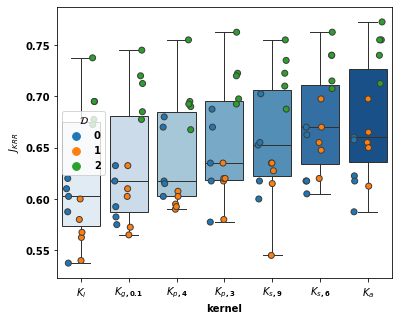

In [37]:
df_compare=pd.DataFrame()
df_compare_1=df_path[['df', 'kfold']]
df_compare_1['kernel']='$K_l$'
df_compare_1['$J_{KRR}$'] = df_path['Kte_linear_score_KRR']
df_compare_1['$\overline{J}_{KRR}$'] = df_path['Kte_linear_score_KRR'].mean()

df_compare = df_compare.append(df_compare_1)

df_compare_2=df_path[['df', 'kfold']]
df_compare_2['kernel']='$K_{g,0.1}$'
df_compare_2['$J_{KRR}$'] = df_path['Kte_gaussian_0.1_score_KRR']
df_compare_2['$\overline{J}_{KRR}$'] = df_path['Kte_gaussian_0.1_score_KRR'].mean()
df_compare = df_compare.append(df_compare_2)

df_compare_3=df_path[['df', 'kfold']]
df_compare_3['kernel']='$K_{s,6}$'
df_compare_3['$J_{KRR}$'] = df_path['Kte_spectrum_DNA_6_score_KRR']
df_compare_3['$\overline{J}_{KRR}$'] = df_path['Kte_spectrum_DNA_6_score_KRR'].mean()
df_compare_3
df_compare = df_compare.append(df_compare_3)

df_compare_4=df_path[['df', 'kfold']]
df_compare_4['kernel']='$K_{s,9}$'
df_compare_4['$J_{KRR}$'] = df_path['Kte_spectrum_DNA_9_score_KRR']
df_compare_4['$\overline{J}_{KRR}$'] = df_path['Kte_spectrum_DNA_9_score_KRR'].mean()
df_compare_4
df_compare = df_compare.append(df_compare_4)

df_compare_5=df_path[['df', 'kfold']]
df_compare_5['kernel']='$K_{p,3}$'
df_compare_5['$J_{KRR}$'] = df_path['Kte_spectrum_protein_3_score_KRR']
df_compare_5['$\overline{J}_{KRR}$'] = df_path['Kte_spectrum_protein_3_score_KRR'].mean()
df_compare_5
df_compare = df_compare.append(df_compare_5)

df_compare_6=df_path[['df', 'kfold']]
df_compare_6['kernel']='$K_{p,4}$'
df_compare_6['$J_{KRR}$'] = df_path['Kte_spectrum_protein_4_score_KRR']
df_compare_6['$\overline{J}_{KRR}$'] = df_path['Kte_spectrum_protein_4_score_KRR'].mean()
df_compare_6
df_compare = df_compare.append(df_compare_6)

df_compare_7=df_path[['df', 'kfold']]
df_compare_7['kernel']='$K_a$'
df_compare_7['$J_{KRR}$'] = df_path['Kte_add_score_KRR']
df_compare_7['$\overline{J}_{KRR}$'] = df_path['Kte_add_score_KRR'].mean()
df_compare_7
df_compare = df_compare.append(df_compare_7)
df_compare = df_compare.rename(columns={"df":"$\mathcal{D}$"})

df_compare = df_compare.sort_values(by=['$\overline{J}_{KRR}$'])

f, axs = plt.subplots(1, 1, sharey=True, figsize=(6,5))
sns.boxplot(x="kernel", y="$J_{KRR}$", palette="Blues", data=df_compare, linewidth=1, ax=axs);
sns.stripplot(x="kernel", y="$J_{KRR}$", hue="$\mathcal{D}$", data=df_compare, dodge=True, size=6, linewidth=1, ax=axs)
f.savefig('rapport/figures/score_by_kernels.pdf')

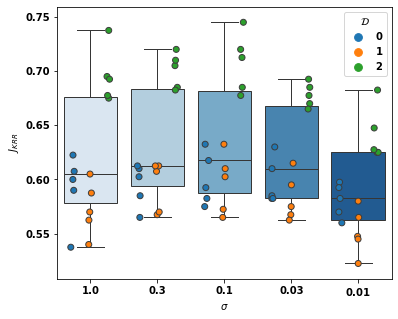

In [19]:
df_compare=pd.DataFrame()
df_compare_1=df_path[['df', 'kfold']]
df_compare_1['$\sigma$']='1.0'
df_compare_1['$J_{KRR}$'] = df_path['Kte_gaussian_1.0_score_KRR']
df_compare_1['$\overline{J}_{KRR}$'] = df_path['Kte_gaussian_1.0_score_KRR'].mean()

df_compare = df_compare.append(df_compare_1)

df_compare_2=df_path[['df', 'kfold']]
df_compare_2['$\sigma$']='0.3'
df_compare_2['$J_{KRR}$'] = df_path['Kte_gaussian_0.3_score_KRR']
df_compare_2['$\overline{J}_{KRR}$'] = df_path['Kte_gaussian_0.3_score_KRR'].mean()
df_compare = df_compare.append(df_compare_2)

df_compare_3=df_path[['df', 'kfold']]
df_compare_3['$\sigma$']='0.1'
df_compare_3['$J_{KRR}$'] = df_path['Kte_gaussian_0.1_score_KRR']
df_compare_3['$\overline{J}_{KRR}$'] = df_path['Kte_gaussian_0.1_score_KRR'].mean()
df_compare_3
df_compare = df_compare.append(df_compare_3)

df_compare_4=df_path[['df', 'kfold']]
df_compare_4['$\sigma$']='0.03'
df_compare_4['$J_{KRR}$'] = df_path['Kte_gaussian_0.03_score_KRR']
df_compare_4['$\overline{J}_{KRR}$'] = df_path['Kte_gaussian_0.03_score_KRR'].mean()
df_compare_4
df_compare = df_compare.append(df_compare_4)

df_compare_5=df_path[['df', 'kfold']]
df_compare_5['$\sigma$']='$0.01$'
df_compare_5['$J_{KRR}$'] = df_path['Kte_gaussian_0.01_score_KRR']
df_compare_5['$\overline{J}_{KRR}$'] = df_path['Kte_gaussian_0.01_score_KRR'].mean()
df_compare_5
df_compare = df_compare.append(df_compare_5)

df_compare = df_compare.rename(columns={"df":"$\mathcal{D}$"})
#df_compare = df_compare.sort_values(by=['$\overline{J}_{KRR}$'])

f, axs = plt.subplots(1, 1, sharey=True, figsize=(6,5))
sns.boxplot(x="$\sigma$", y="$J_{KRR}$", palette="Blues", data=df_compare, linewidth=1, ax=axs);
#sns.stripplot(x="kernel", y="$J_{KRR}$", marker="v", color=".1", dodge=True, data=df_compare[df_compare["$\mathcal{D}$"] == 0], size=6, linewidth=0, ax=axs)
#sns.stripplot(x="kernel", y="$J_{KRR}$", marker="o", color=".1", data=df_compare[df_compare["$\mathcal{D}$"] == 1], size=6, linewidth=0, ax=axs)
#sns.stripplot(x="kernel", y="$J_{KRR}$", marker="s", color=".1", data=df_compare[df_compare["$\mathcal{D}$"] == 2], size=6, linewidth=0, ax=axs)
sns.stripplot(x="$\sigma$", y="$J_{KRR}$", hue="$\mathcal{D}$", data=df_compare, dodge=True, size=6, linewidth=1, ax=axs)
#sns.boxplot(x="kernel", y="$J_{KRR}$", hue="$\mathcal{D}$", data=df_compare, ax=axs);
#axs.set(ylabel=None)
f.savefig('rapport/figures/gaussian_kernel_sigma_opti.pdf')

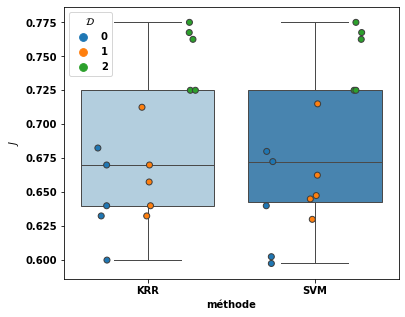

In [20]:
df_compare=pd.DataFrame()
df_compare_1=df_path[['df', 'kfold']]
df_compare_1['$J$'] = df_path['Kte_add_score_KRR']
df_compare_1['méthode'] = 'KRR'
df_compare = df_compare.append(df_compare_1)

df_compare_2=df_path[['df', 'kfold']]
df_compare_2['$J$'] = df_path['Kte_add_SVM_score_SVM']
df_compare_2['méthode'] = 'SVM'
df_compare = df_compare.append(df_compare_2)

df_compare = df_compare.rename(columns={"df":"$\mathcal{D}$"})
#df_compare = df_compare.sort_values(by=['$\overline{J}_{KRR}$'])

f, axs = plt.subplots(1, 1, sharey=True, figsize=(6,5))
sns.boxplot(x="méthode", y="$J$", palette="Blues", data=df_compare, linewidth=1, ax=axs);
sns.stripplot(x="méthode", y="$J$", hue="$\mathcal{D}$", data=df_compare, dodge=True, size=6, linewidth=1, ax=axs)
#sns.boxplot(x="kernel", y="$J_{KRR}$", hue="$\mathcal{D}$", data=df_compare, ax=axs);
#axs.set(ylabel=None)
f.savefig('rapport/figures/score_by_method.pdf')

In [21]:
df_CV_add = pd.DataFrame()

df_id_to_infer = list(range(3,18))
for regKRR in regKRR_grid:
    #training
    scoresKRR = infer_and_predict_KRR(df_path, df_id_to_infer, 'add', regKRR)
    df_CV_add_reg = pd.DataFrame()
    df_CV_add_reg['$\mathcal{D}$'] = df_path['df'].loc[df_id_to_infer]
    df_CV_add_reg['$\lambda_{KRR}$'] = regKRR
    df_CV_add_reg['$J_{KRR}(K_a)$'] = scoresKRR
    df_CV_add = df_CV_add.append(df_CV_add_reg)

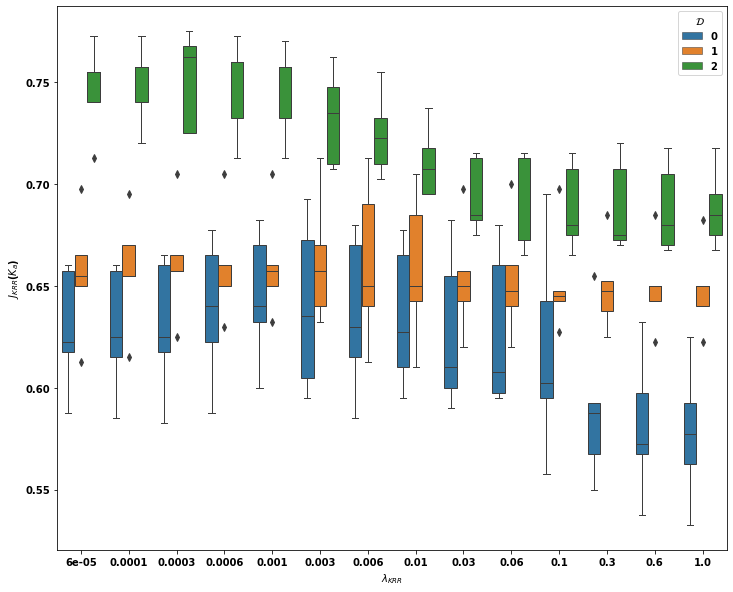

In [22]:
f, axs = plt.subplots(1, 1, sharey=True, figsize=(12,10))
sns.boxplot(x="$\lambda_{KRR}$", y="$J_{KRR}(K_a)$", hue="$\mathcal{D}$", data=df_CV_add, linewidth=1, ax=axs);
#sns.stripplot(x="$\lambda_{KRR}$", y="$J_{KRR}(K_a)$", hue="$\mathcal{D}$", data=df_CV_add, dodge=True, size=6, linewidth=1, ax=axs)
#axs.set(ylabel=None)
f.savefig('rapport/figures/score_by_lambda.pdf')

In [23]:
print(df_path['Kte_add_score_KRR'].mean())
print(df_path['Kte_add_SVM_score_SVM'].mean())

0.6773333333333333
0.6831666666666666


In [24]:
df_path['Kte_spectrum_protein_4_score_KRR'].mean()

0.6448333333333334

In [29]:
df_path.to_csv('data_and_kernels/data_path_with_kernels_and_models.csv', index=False)

# mise en forme des prédictions du meilleur pour envoi au dataChallenge

In [26]:
#best_pred = 'Kte_spectrum_DNA_6_pred_KRR'
#mean : 0.67033
#leaderboard : 0.64666

#best_pred = 'Kte_add_pred_KRR'
#spectrum_DNA_6, spectrum_DNA_9, gaussian_0.1
#mean: 0.6846666
#leaderboard : 0.64666

best_pred = 'Kte_add_pred_KRR'
#spectrum_DNA_6, spectrum_DNA_9, spectrum_protein_3, spectrum_protein_4
#mean: 0.6861666
#leaderboard : 0.67000

df0_send = pd.DataFrame({'Id': get_npArray_dfid(df_path, 0, 'Xte_id'),
                         'Bound': (get_npArray_dfid(df_path, 0, best_pred)).astype(int)})
df1_send = pd.DataFrame({'Id': get_npArray_dfid(df_path, 1, 'Xte_id'),
                         'Bound': (get_npArray_dfid(df_path, 1, best_pred)).astype(int)})
df2_send = pd.DataFrame({'Id': get_npArray_dfid(df_path, 2, 'Xte_id'),
                         'Bound': (get_npArray_dfid(df_path, 2, best_pred)).astype(int)})

df_send = pd.concat([df0_send, df1_send, df2_send]).reset_index(drop=True)


In [30]:
df_send.to_csv('predictions/Yte.csv', index=None, sep=',')

In [28]:
df_send

Id  Bound
0        0      0
1        1      1
2        2      1
3        3      1
4        4      0
...    ...    ...
2995  2995      1
2996  2996      0
2997  2997      0
2998  2998      0
2999  2999      1

[3000 rows x 2 columns]